## Question 1 - Expected Risk Minimization (15 pts)
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

### Answer


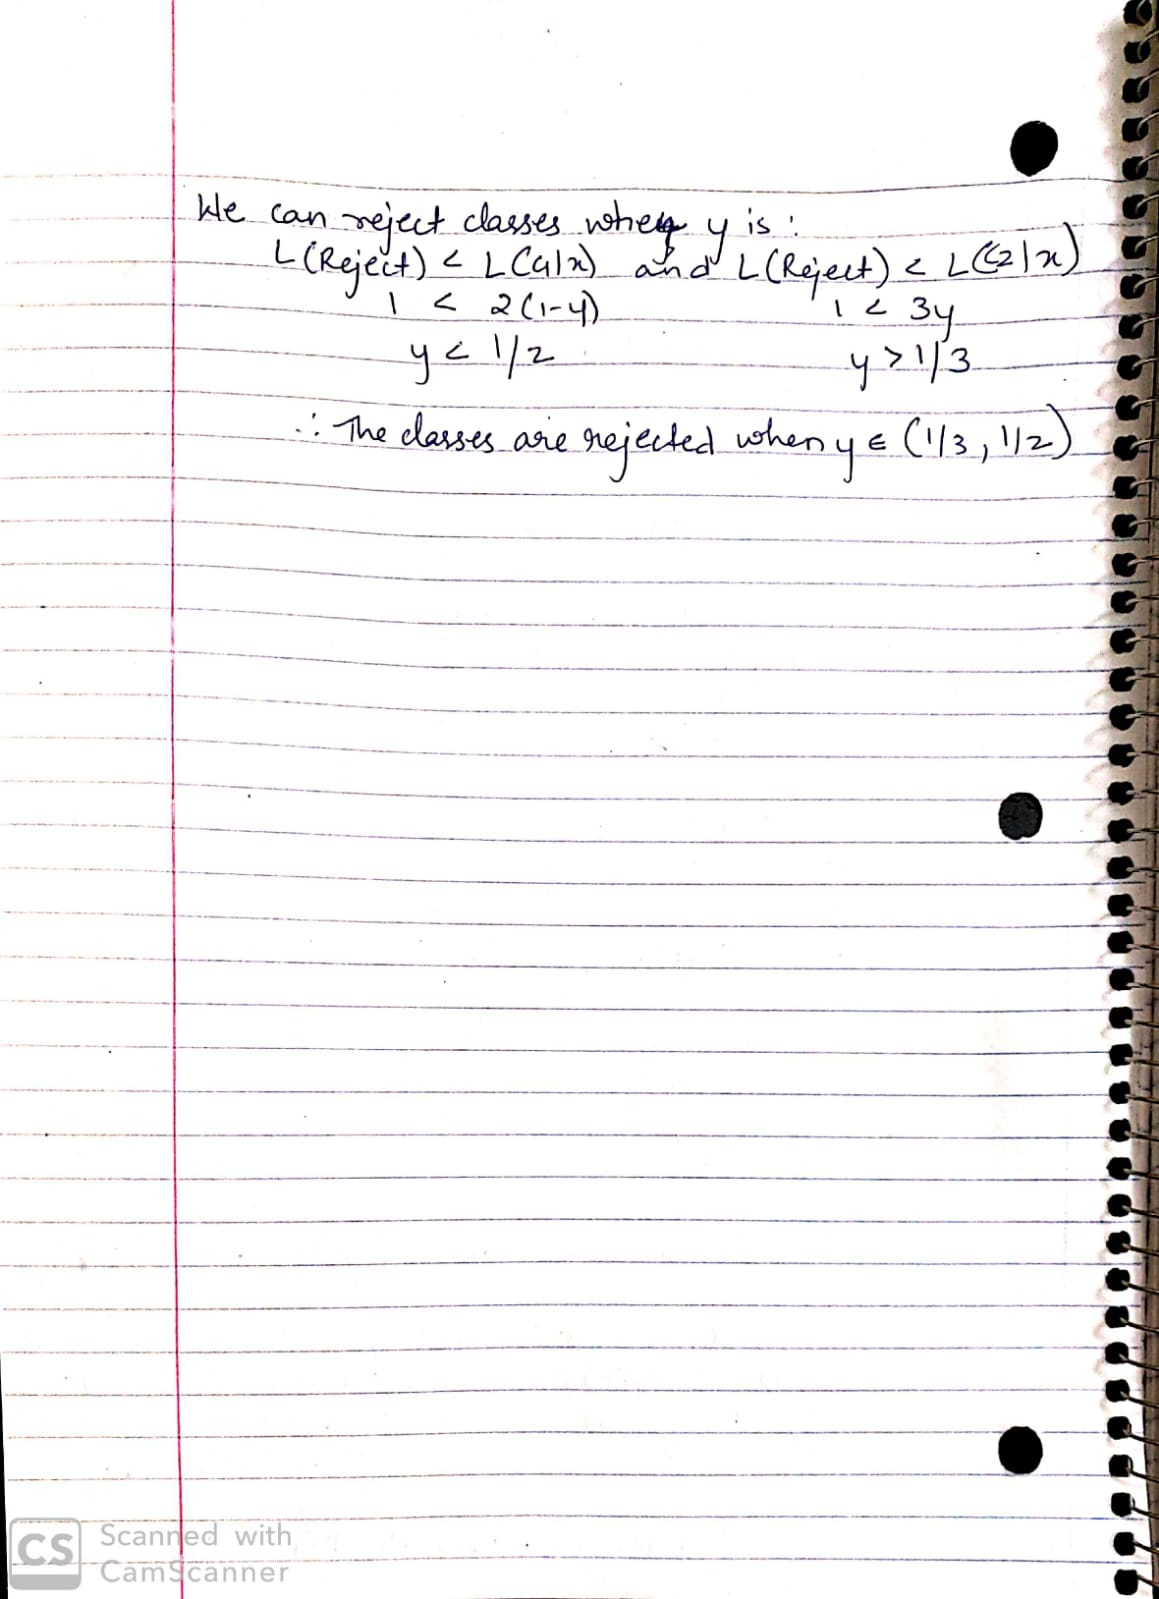

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import Image 
Image('Q1.jpeg')
Image('Q1_2.jpeg')
Image('Q1_3.jpeg')

1. 

The expected loss would be minimum if we always reject the classes instead of predicting

2. 

The loss is minimum when we predict as follows:
Class 1 : P(C1|x) > 2/5
Class 2 : P(C2|x) < 2/5
Reject : We don't reject for any value of P(C1|x)

3. 

The loss is minimum when we predict as follows:
Class 1 : P(C1|x) > 1/2
Class 2 : P(C2|x) < 1/3
Reject : 1/3 < P(C2|x) < 1/2

## Question 2 - Concepts (10 pts)

Emma is a high school student who is creating a model for spam classification, which is well known to be an imbalanced classification problem. During the course of modeling, she had various observations and she is not sure if these observations suggest anything about the correctness of her modeling exercise. You are given two such instances below. For each observation identify what the problem with it may be (if any) and suggest a way to correct it. 

1. She thinks that the most important signal to identify spam emails is the sender. So, she creates a feature called is_sender_spammer and populates it with the percentage of emails sent by the sender that were spam, in the given dataset. The way she created this feature was - for each email, she counted the number of emails sent by each sender which were labeled as true spam and divided by the total number of emails sent by the sender. She then divides the given dataset into train and test and trains a logistic regression classifier using just this one feature. The AUROC on the test dataset comes out to be 0.99. She thinks this is too good to be true. What do you think may be the problem with her approach, and how can this be fixed?

2. She then changes her approach and tries multiple sets of features with different models. She finds out that whatever features or models she uses the classification accuracy on the test dataset is always above 90%. Why do you think this could happen?


# 2.1 



In creating the feature, dependent variable of spam was used. Going forward, Emma should not use this variable. Additionally, any features that she creates should be created after splitting the data into train and test to avoid the test set information from being used to train the model. She can create other features like text in the mail, spelling errors etc. 

# 2.2

The spam classification problem is an imbalanced classes problem i.e. there are very less number of emails which are spam in the dataset. So, if a model classifies every email as spam, it would still have an accuracy over 90% owing to the same percentage of the emails actually being spam. Accuracy only measures how many times the model predicts the class correctly and doesn't take into account the cost of wrongly identifying the class of interest.  

# Question 3 - Churn Prediction (50pts)

In this problem, you are provided with data from a bank. The objective is to process the data and build predictive models to classify if a customer is going to churn or not. You will be using sklearn [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and transformers in this exercise.


1. What proportion of the users in the data churn? (2pts)
2. Do credit card users churn more when compared to other users? (use a suitable plot) (3pts)
3. Set up the transformer for min-max normalization. Other required transformers are provided. (5pts)
4. Scikit-learn provides the capability to create Machine Learning workflows by using a construct known as Pipeline. ML modeling pipelines can be viewed as directed acyclic graphs where each node is an "operator" performing some processing on the data frames or ndarrays. Use this [guide](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) to understand how to create a pipeline and create a pipeline which has the following steps:<br>
    a. One hot encoding transformer on the categorical variables.<br>
    b. Min-max normalization transformer on the continuous variables.<br>
    c. Logistic Regression model.<br>
    Using the code for transformers given to you, fit this pipeline on the train set and report the F1 score and AUROC on the test set. (10pts)   
5. Add the following features to the data:<br>
    a. Ratio of balance to salary.<br>
    b. Ratio of tenure to age.<br>
    c. Ratio of credit score to age.<br>
   Using this new data, build a similar Logistic Regression pipeline as in the previous question and report the F1 score and AUROC on the test set. We see that the performance of the model improves with these additional features, hence we will be using the new dataset with these additional features from now (this question and all the questions ahead). 
   We have seen that the two classes are imbalanced in the data. We can improve the logistic regression model by changing the importance given to the classes - use the class_weight='balanced' option (by default, both classes have equal importance). Report the F1 score and AUROC on the test set. (10 pts)
6. Build multiple MLP pipelines by varying the number of hidden units, activation and optimizer (atleast 12). Plot the ROC curve for the different MLP pipeleines using the test set (in one plot - use markers since the number of colors are limited).  Report your best F1 score on the test set. (10pts)
7. Build a decision tree and Gaussian Naive Bayes pipelines. Plot an ROC for these two models, the improved logistic regression model and the best MLP model (in one plot). (5pts).
8. The calibration curve gives you a way of testing if your model is well-calibrated or not. Use sklearn's [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html) function to plot the calibration curve for the Gaussian Naive Bayes model, the improved logistic regression model, and the best MLP model and report which models are well-calibrated and which ones are not. (5 pts)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('q3.csv', delimiter=',')
df.shape
df.head()

(10000, 11)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Answer

#### (1)

In [4]:
print(str(round(df.Exited.mean()*100,2)) + '%  of the users in the data churn')

20.37%  of the users in the data churn


#### (2)

There is not a significant difference between credit card users and others.
Churn among the users with credit card is 20.18% and it is 20.81% among the others.

,HasCrCard
1,0.201843
0,0.208149


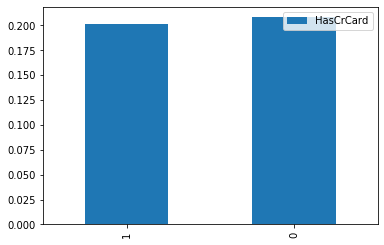

In [5]:
df_cr = pd.DataFrame(df[df['Exited']==1]['HasCrCard'].value_counts())
for i in df_cr.index.values:
    df_cr.loc[i] = float(df_cr.loc[i])/(df[df['HasCrCard']==i]['HasCrCard'].shape[0])

df_cr.plot(kind='bar') 
df_cr

In [6]:
#DONOT CHANGE THIS
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

from sklearn.base import BaseEstimator, TransformerMixin
#We provide the required transformers to build the pipeline.
# Transfomer for performing one hot encoding on a specified categorical column
class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  

#### (3)

In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
class MinMaxTransform(BaseEstimator, TransformerMixin):

    def __init__(self,cols=None):
        self.cols = cols
        self.minVec = np.zeros(len(cols))
        self.maxVec = np.zeros(len(cols))
       
    def transform(self, X):
        X[self.cols] = ((X[self.cols] - self.minVec)/(self.maxVec-self.minVec))
        return X

    def fit(self, X, y=None):
        self.minVec = (df_train[self.cols].min())
        self.maxVec = (df_train[self.cols].max())
        return self

#### (4)
Sikit-learn provides the capability to create Machine Learning workflows by using a construct known as Pipeline. ML modeling pipelines can be viewed as directed acyclic graphs where each node is an "operator" performing some processing on the data frames or ndarrays. Use this guide to understand how to create a pipeline and create a pipeline which has the following steps:
a. One hot encoding transformer on the categorical variables.
b. Min-max normalization transformer on the continuous variables.
c. Logistic Regression model.
Using the code for transformers given to you, fit this pipeline on the train set and report the F1 score and AUROC on the test set.

In [8]:
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).drop('Exited', axis=1).columns
categorical_features = df_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxTransform(numeric_features))])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categorical_features))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

X_train = df_train.drop('Exited',axis=1)
y_train = df_train['Exited']
X_test = df_test.drop('Exited',axis=1)
y_test = df_test['Exited']

log_reg.fit(X_train, y_train)

y_hat = log_reg.predict(df_test.drop('Exited',axis=1))

print("F1 score is: "+str(f1_score(y_test,y_hat)))

if hasattr(log_reg, "predict_proba"):
    prob_pos = log_reg.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = log_reg.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

print("AUCROC is: "+ str(roc_auc_score(y_test, prob_pos)))

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')))],
                                                           verb...
                                                                   OneHotEncoder(col=Index(['Geography', 'Gender'], dtype='object')))],
                                                           verbose=False),
                                      

F1 score is: 0.30654205607476637
AUCROC is: 0.7962531525057558


#### (5)
Add the following features to the data:
a. Ratio of balance to salary.
b. Ratio of tenure to age.
c. Ratio of credit score to age.
Using this new data, build a similar Logistic Regression pipeline as in the previous question and report the F1 score and AUROC on the test set. We see that the performance of the model improves with these additional features, hence we will be using the new dataset with these additional features from now (this question and all the questions ahead). We have seen that the two classes are imbalanced in the data. We can improve the logistic regression model by changing the importance given to the classes - use the class_weight='balanced' option (by default, both classes have equal importance). Report the F1 score and AUROC on the test set. (10 pts)

In [9]:
df_train['balance_to_salary'] = df_train['Balance']/df['EstimatedSalary']
df_train['tenure_to_age'] = df_train['Tenure']/df['Age']
df_train['credit_score_to_age'] = df_train['CreditScore']/df['Age']

df_test['balance_to_salary'] = df_test['Balance']/df['EstimatedSalary']
df_test['tenure_to_age'] = df_test['Tenure']/df['Age']
df_test['credit_score_to_age'] = df_test['CreditScore']/df['Age']

X_train = df_train.drop('Exited',axis=1)
y_train = df_train['Exited']
X_test = df_test.drop('Exited',axis=1)
y_test = df_test['Exited']

numeric_features = df_train.select_dtypes(include=['int64', 'float64']).drop('Exited', axis=1).columns
categorical_features = df_train.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxTransform(numeric_features))])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(categorical_features))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

log_reg1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])
log_reg2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight='balanced'))])

log_reg1.fit(X_train, y_train)
y_hat1 = log_reg1.predict(X_test)

log_reg2.fit(X_train, y_train)
y_hat2 = log_reg2.predict(X_test)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                                                                   OneHotEncoder(col=Index(['Geography', 'Gender'], dtype='object')))],
                                                           verbose=False),
                                                  Index(['Geography', 'Gender'], dtype='object')

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                                                                   OneHotEncoder(col=Index(['Geography', 'Gender'], dtype='object')))],
                                                           verbose=False),
                                                  Index(['Geography', 'Gender'], dtype='object')

In [10]:
print("F1 score is: "+str(f1_score(y_test,y_hat1)))
if hasattr(log_reg1, "predict_proba"):
    prob_pos = log_reg1.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = log_reg1.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

print("AUCROC is: "+str(roc_auc_score(y_test, prob_pos)))

F1 score is: 0.34119782214156075
AUCROC is: 0.7993991739786492


In [11]:
print("F1 score with class_weight is: "+str(f1_score(y_test,y_hat2)))

if hasattr(log_reg2, "predict_proba"):
    prob_pos = log_reg2.predict_proba(X_test)[:, 1]
else:  # use decision function
    prob_pos = log_reg2.decision_function(X_test)
    prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

print("AUCROC with class_weight is: "+str(roc_auc_score(y_test, prob_pos)))

F1 score with class_weight is: 0.5185185185185185
AUCROC with class_weight is: 0.800297819297531


#### (6)
Build multiple MLP pipelines by varying the number of hidden units, activation and optimizer (atleast 12). Plot the ROC curve for the different MLP pipeleines using the test set (in one plot - use markers since the number of colors are limited). Report your best F1 score on the test set. (10pts)

<Figure size 720x720 with 0 Axes>

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=200, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=500, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=500, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=500, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=500, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=500, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=500, learning_rate='constant',
                               learning_rate_init=0.001, max_iter=200,
           

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

Best F1 score is: 0.6215469613259669
Best parameters: hidden_layer_sizes=1000, solver=lbfgs, activation=relu


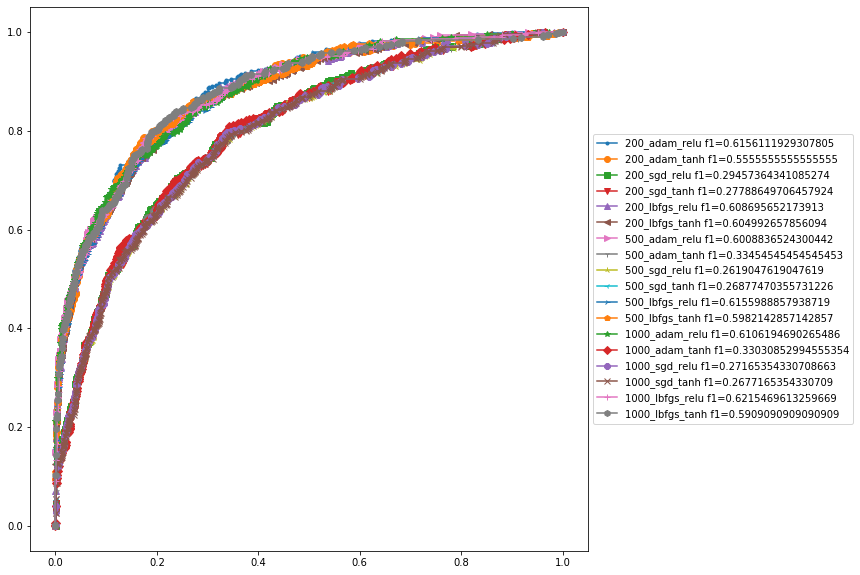

In [12]:
#MLP Regression models for (b)
import itertools
hidden_layer_size_list = [200, 500, 1000]
solver_list = ['adam', 'sgd', 'lbfgs']
activation_list = ['relu', 'tanh']

params = list(itertools.product(hidden_layer_size_list, solver_list, activation_list))

f1_list = []

plt.figure(figsize=(10, 10))

markers_list = ['.','o','s','v','^','<','>','1','2','3','4','p','*','D','8','x','+','h']
for i in range(len(params)):
    h, s, a = params[i]
    mlp = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', MLPClassifier(hidden_layer_sizes=h, solver=s, activation=a))])
    mlp.fit(X_train,y_train)
    y_hat = mlp.predict(X_test)
    if hasattr(mlp, "predict_proba"):
        prob_pos = mlp.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = mlp.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fpr, tpr, thresh = roc_curve(y_test, prob_pos)
    f1 = f1_score(y_test,y_hat)
    f1_list.append(f1)
    plt.plot(fpr,tpr,label=str(h)+'_'+str(s)+'_'+str(a)+' f1='+str(f1), marker=markers_list[i])
    plt.legend(loc = 'center left',bbox_to_anchor = (1,0.5))

val, idx = max((val, idx) for (idx, val) in enumerate(f1_list))

best_h, best_s, best_a = params[idx]

print("Best F1 score is: "+str(val))
print("Best parameters: hidden_layer_sizes="+str(best_h)+", solver="+str(best_s)+", activation="+str(best_a))

#### (7)
Build a decision tree and Gaussian Naive Bayes pipelines. Plot an ROC for these two models, the improved logistic regression model and the best MLP model (in one plot). (5pts).

<Figure size 720x720 with 0 Axes>

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                                                  Index(['Geography', 'Gender'], dtype='object'))],
                                   verbose=False)),
                ('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_dep

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'tenure_to_age', 'credit_score_to_age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(memory=None,
                                         

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                                                                   OneHotEncoder(col=Index(['Geography', 'Gender'], dtype='object')))],
                                                           verbose=False),
                                                  Index(['Geography', 'Gender'], dtype='object')

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

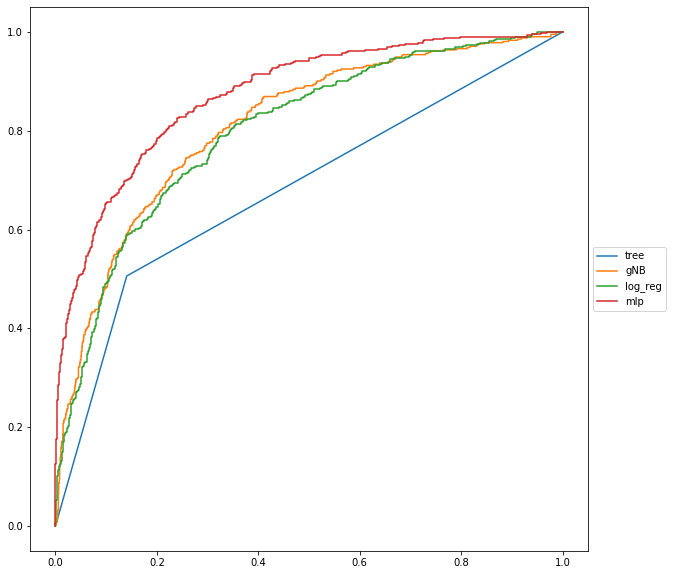

In [13]:
t = DecisionTreeClassifier()
gNB = GaussianNB()
log_reg = LogisticRegression(class_weight='balanced')
mlp = MLPClassifier(hidden_layer_sizes=best_h, solver=best_s, activation=best_a)
models = [t, gNB, log_reg, mlp]
model_names = ['tree', 'gNB', 'log_reg', 'mlp']

plt.figure(figsize=(10, 10))
for i in range(len(models)):
    model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', models[i])])
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = model.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fpr, tpr, thresh = roc_curve(y_test, prob_pos)
    f1 = f1_score(y_test,y_hat)
    f1_list.append(f1)
    plt.plot(fpr,tpr,label=model_names[i])
    plt.legend(loc = 'center left',bbox_to_anchor = (1,0.5))


#### (8)
The calibration curve gives you a way of testing if your model is well-calibrated or not. Use sklearn's calibration_curve function to plot the calibration curve for the Gaussian Naive Bayes model, the improved logistic regression model, and the best MLP model and report which models are well-calibrated and which ones are not.

# Answer
From the curves we can see that Naive Bayes and MLR are well calibrated models as they are closer to our perfectly calibrated line. Logistical regression is the least calibrated model as it is away from the perfectly calibrated line

<Figure size 720x720 with 0 Axes>

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'tenure_to_age', 'credit_score_to_age'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(memory=None,
                                         

(array([1295.,  245.,  118.,   73.,   66.,   57.,   44.,   36.,   30.,
          36.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                                                                   OneHotEncoder(col=Index(['Geography', 'Gender'], dtype='object')))],
                                                           verbose=False),
                                                  Index(['Geography', 'Gender'], dtype='object')

(array([ 82., 256., 308., 310., 296., 265., 191., 171., 105.,  16.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxTransform(cols=Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'balance_to_salary',
       'ten...
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=1000,
                               learning_rate='constant',
                               learning_rate_init=

(array([1121.,  255.,  144.,  113.,   61.,   55.,   57.,   50.,   38.,
         106.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

Text(0, 0.5, 'Fraction of positives')

(-0.05, 1.05)

Text(0.5, 1.0, 'Calibration plots  (reliability curve)')

Text(0.5, 0, 'Mean predicted value')

Text(0, 0.5, 'Count')

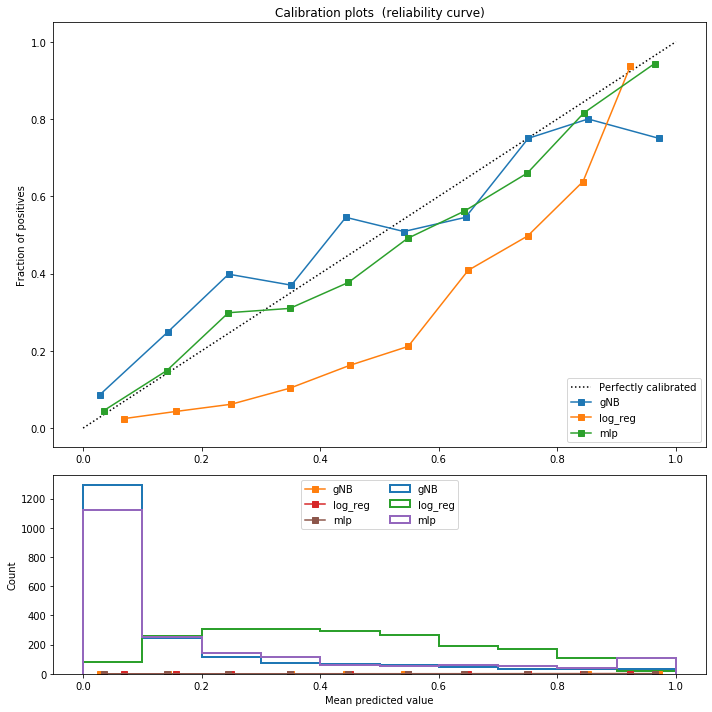

In [14]:
from sklearn.calibration import calibration_curve
gNB = GaussianNB()
log_reg = LogisticRegression(class_weight='balanced')
mlp = MLPClassifier(hidden_layer_sizes=best_h, solver=best_s, activation=best_a)
models = [gNB, log_reg, mlp]
model_names = ['gNB', 'log_reg', 'mlp']

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for i in range(len(models)):
    model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', models[i])])
    model.fit(X_train,y_train)
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = model.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
    
    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (model_names[i], ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=model_names[i],
             histtype="step", lw=2)

    plt.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (model_names[i], ))
    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()
